In [2]:
# Import pandas library 
import pandas as pd 
# initialize list of lists 
data = [['soleado', 36,'alta', 'leve', 'no'], 
        ['soleado', 28,'alta', 'fuerte','no'], 
        ['nubaldo', 30,'alta', 'leve', 'si'],
        ['lluvioso',20,'alta','leve','si'],
        ['lluvioso',2,'normal','leve','si'],
        ['lluvioso',5,'normal','fuerte','no'],
        ['nublado',11,'normal','fuerte','si'],
        ['soleado',22,'alta','leve','no'],
        ['soleado',9,'normal','leve','si'],
        ['lluvioso',17,'normal','leve','si'],
        ['soleado',19,'normal','fuerte','si'],
        ['nublado',22,'alta','fuerte','si'],
        ['nublado',27,'normal','leve','si'],
        ['lluvioso',21,'alta','fuerte','no']] 
index1=['PRONOSTICO', 'TEMPERATURA','HUMEDAD','VIENTO','ASADO']
#data 2
data2=[['sunny','high','weak','no'],
       ['sunny','high','strong','no'],
       ['overcast','high','weak','yes'],
       ['rain','high','weak','yes'],
       ['rain','normal','weak','yes'],
       ['rain','normal','strong','no'],
       ['overcast','normal','strong','yes'],
       ['sunny','high','weak','no'],
       ['sunny','normal','weak','yes'],
       ['rain','normal','weak','yes'],
       ['sunny','normal','strong','yes'],
       ['overcast','high','strong','yes'],
       ['overcast','normal','weak','yes'],
       ['rain','high','strong','no']]
index2=['OUTLOOK','HUMIDITY','WIND','PLAY']
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns =index1) 
# print dataframe. 
df 

,PRONOSTICO,TEMPERATURA,HUMEDAD,VIENTO,ASADO
0,soleado,36,alta,leve,no
1,soleado,28,alta,fuerte,no
2,nubaldo,30,alta,leve,si
3,lluvioso,20,alta,leve,si
4,lluvioso,2,normal,leve,si
5,lluvioso,5,normal,fuerte,no
6,nublado,11,normal,fuerte,si
7,soleado,22,alta,leve,no
8,soleado,9,normal,leve,si
9,lluvioso,17,normal,leve,si


##Classe

In [33]:
class Naive_Bayes:
  def __init__(self,data):
    self.data=data

  def normal_dist(self,x,mean,variance) :
    return 1/(math.sqrt(2*math.pi)*math.sqrt(variance))*math.e**(-((x-mean)**2/(2*variance)))
  def variance(self,data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / (n-1)
    return variance
  def predict(self,predict):
    result=1
    results=[]
    targets=self.data[self.target_column_name].unique()
    for target in targets:
      #print(target)
      for i in range(len(self.features)-1):
        #print(self.features[i]," ",predict[i])
        if self.features[i] not in self.continuous_variables:
          #print(self.likelihood_tables[self.features[i]].loc[predict[i]][target])
          result=self.likelihood_tables[self.features[i]].loc[predict[i]][target]*result
        else:
          #print("train :",self.likelihood_tables[self.features[i]][target],"predict :",predict[i])
          #print("mean: ",self.likelihood_tables[self.features[i]][target]["mean"])
          result=self.normal_dist(predict[i],self.likelihood_tables[self.features[i]][target]["mean"],self.likelihood_tables[self.features[i]][target]["variance"])*result
          #print(self.normal_dist(predict[i],self.likelihood_tables[self.features[i]][target]["mean"],self.likelihood_tables[self.features[i]][target]["variance"]))
      result=result*self.likelihood_tables[self.target_column_name].loc[target]["total"]
      results.append(result)
      result=1
    print(" ")
    print(predict)
    for i in range(len(targets)):
      print(self.target_column_name,'=',targets[i]," ",results[i]/(sum(results)))
  
  def train(self,features,continuous_variables,target_column_name):
    y_column_name=target_column_name
    features.append(target_column_name)
    self.features=features
    self.continuous_variables=continuous_variables
    self.target_column_name=target_column_name
    #features.remove(y_column_name)
    #print(features)

    #tablas de frecuencia
    frecuency_tables={}
    #print(continuous_variables)
    categorical_features= list(set(features).difference(set(continuous_variables)))
    #print(categorical_features)
    for feature in categorical_features:
      data = [] 
      total=[]
      for unique_value in self.data[feature].unique():
        data_unique=[]
        for target in self.data[y_column_name].unique():
          count=self.data[(self.data[feature]==unique_value) & (self.data[y_column_name]==target)].count()[feature]
          data_unique.append(count)
          #print(feature,unique_value,count,target)
        data.append(data_unique)
        total.append(sum(data_unique))
      frecuency_tables[feature]=pd.DataFrame(data, columns = self.data[y_column_name].unique(), index=self.data[feature].unique())
      frecuency_tables[feature]['total']=total
      #print(tables[feature])
      #print(data)

    #for feature in categorical_features:
      #print(frecuency_tables[feature])
    #likelihood tables
    likelihood_tables=frecuency_tables.copy()
    for feature in features:
      if feature in categorical_features:
        for column in list(likelihood_tables[feature]):
          likelihood_tables[feature][column]=likelihood_tables[feature][column].apply(lambda x: x/likelihood_tables[feature][column].sum())
      else:
        temp={}
        for target in self.data[target_column_name].unique():
          continuos=list(self.data[self.data[target_column_name]==target][feature])
          #print(target," ",continuos)
          mean=sum(continuos) / len(continuos)
          variance=self.variance(continuos)
          temp[target]={"variance":variance,"mean":mean}
          #print(target," ",temp[target])
        likelihood_tables[feature]=temp
        #print(feature)
    #save likelihood tables
    self.likelihood_tables=likelihood_tables
    #for feature in categorical_features:
      #print(likelihood_tables[feature].head()) 

##Predicciones

In [34]:
n=Naive_Bayes(df)
n.train(['PRONOSTICO','TEMPERATURA','HUMEDAD', 'VIENTO'],['TEMPERATURA'],'ASADO')
n.predict(['soleado',19,'normal','leve'])
n.predict(['lluvioso',34,'alta','leve'])
n.predict(['nublado',14,'normal','fuerte'])

 
['soleado', 19, 'normal', 'leve']
ASADO = no   0.1693925266189205
ASADO = si   0.8306074733810795
 
['lluvioso', 34, 'alta', 'leve']
ASADO = no   0.7172465769160923
ASADO = si   0.2827534230839078
 
['nublado', 14, 'normal', 'fuerte']
ASADO = no   0.0
ASADO = si   1.0


##Ejemplo de tabla de probabilidad

In [27]:
n.likelihood_tables['PRONOSTICO']

,no,si,total
soleado,0.6,0.222222,0.357143
nubaldo,0.0,0.111111,0.071429
lluvioso,0.4,0.333333,0.357143
nublado,0.0,0.333333,0.214286


##obtengo las graficas de probabilidad de temperatura

8.875684637129565


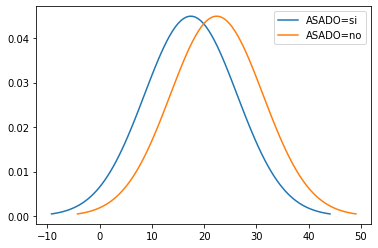

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 17.444444444444443
variance = 78.77777777777779
sigma = math.sqrt(variance)

mu2 = 22.4
variance2 = 130.29999999999998
sigma2 = math.sqrt(variance)

print(sigma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),label='ASADO=si')
x = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x, stats.norm.pdf(x, mu2, sigma2),label='ASADO=no')
plt.legend()
plt.show()